In [1]:
%config InlineBackend.figure_format = 'retina'
from matplotlib import pyplot as plt
plt.style.use('jupyter_dark')

---
# 2. ADVANCED CIRCUITS

## Question 2.1

**How do you merge the lhs and rhs circuits to form the final circuit?**

<div align= "left">
    <p style="float: left;"><b> lhs:  </b></p> 
    <p><img src="..\images\advanced_circuits_images\lhs.png" style="float: left;" width = "210"/> </p> 
    <p style="float: left;"><b> rhs:  </b></p> 
    <p><img src="..\images\advanced_circuits_images\rhs.png" style="float: left;" width = "160"/> </p>
    <p style="float: left;"><b> final:  </b></p> 
    <p><img src="..\images\advanced_circuits_images\merged.png" style="float: left;" width = "300"/> </p>
</div>

**1)** `lhs.append(rhs)`

**2)** `lhs.combine(rhs)`

**3)** `lhs.compose(rhs)`

**4)**  `lhs+rhs`

**5)**  None of the above

In [2]:
from qiskit import QuantumCircuit

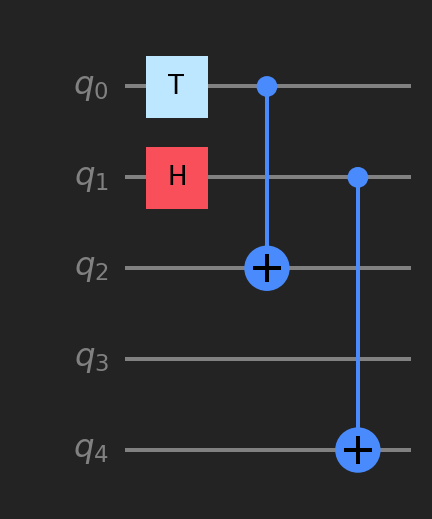

In [3]:
qc_lhs = QuantumCircuit(5)
qc_lhs.t(0)
qc_lhs.h(1)
qc_lhs.cx(0,2)
qc_lhs.cx(1,4)
qc_lhs.draw()

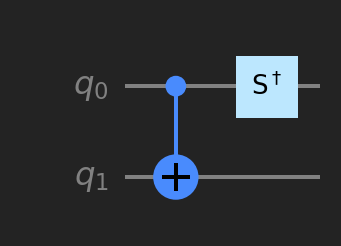

In [4]:
qc_rhs = QuantumCircuit(2)
qc_rhs.cx(0,1)
qc_rhs.sdg(0)
qc_rhs.draw()

In [5]:
# This syntax doesn't work. Need to specify qubits. See next cell.
qc_final = qc_lhs.append(qc_rhs)

CircuitError: 'The amount of qubit arguments 0 does not match the instruction expectation (2).'

In [ ]:
# The .append() method "appends" a new circuit as an instruction 
# to an existing circuit to in the specified qubits
qc_final = qc_lhs.copy()
qc_final.append(qc_rhs,[0,1])
qc_final.draw()

In [ ]:
qc_final.decompose().draw()

In [ ]:
# .combine() has been deprecated. Furthermore, # of qubits between the 2 circuits must match
qc_final = qc_lhs.combine(qc_rhs)

In [ ]:
qc_final = qc_lhs.compose(qc_rhs)
qc_final.draw()

---
## Question 2.2

**What's the depth of `QuantumVolume(num_qubits=5, depth=5)` circuit after decomposition into basis gates `[u3,cx]`?**

**1)** 5

**2)** 10

**3)** 25

**4)** 35

**5)** None of the above

In [8]:
from qiskit.circuit.library import QuantumVolume

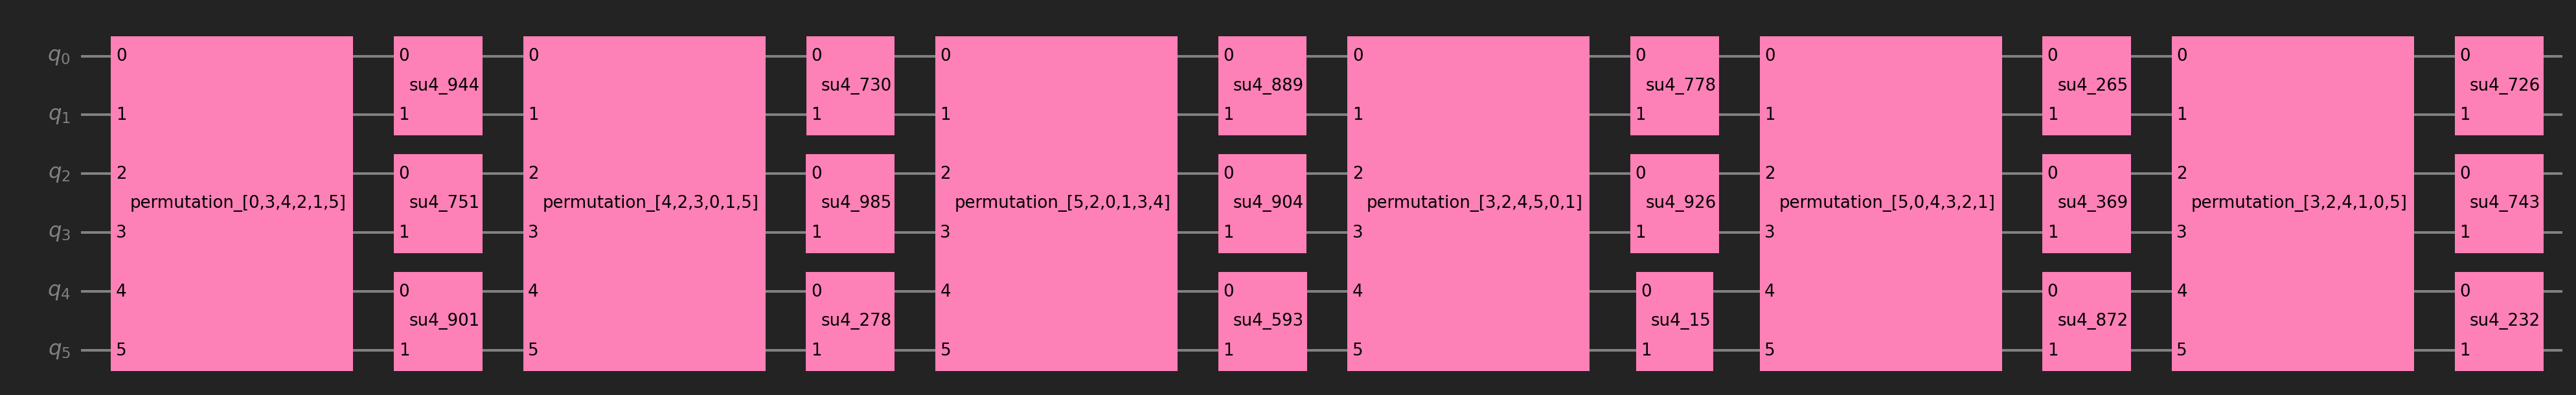

In [16]:
#qc_qv = QuantumVolume(num_qubits=5, depth=5)
qc_qv = QuantumVolume(num_qubits=6, depth=6, classical_permutation=False)
qc_qv = qc_qv.decompose()
qc_qv.draw(fold=50)

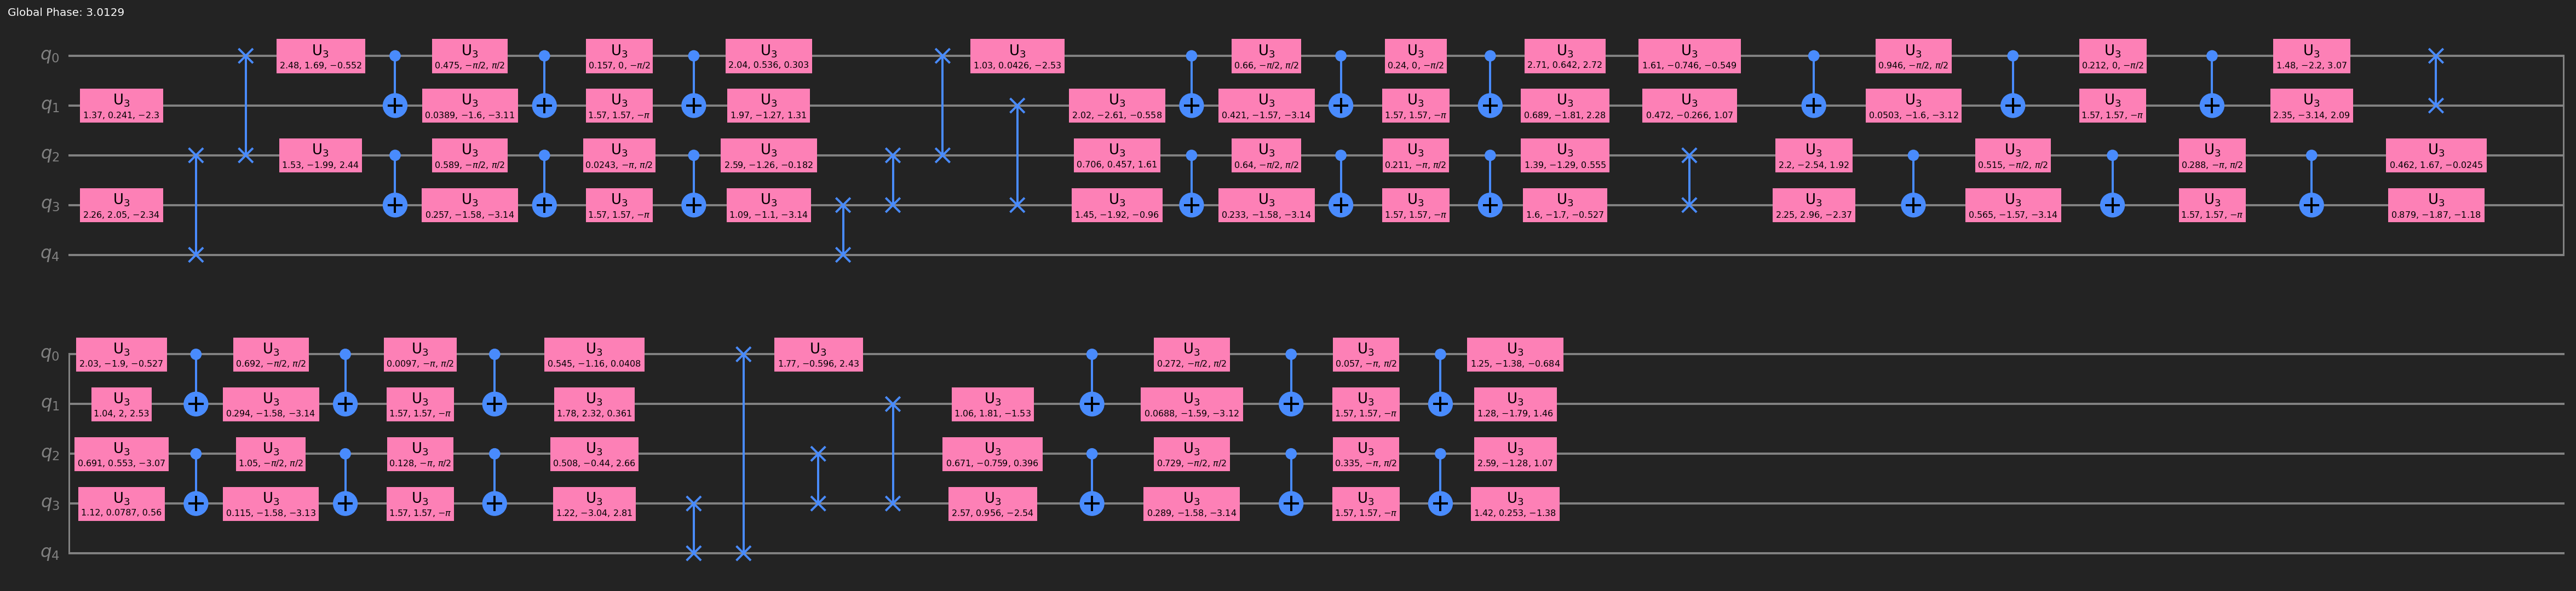

In [15]:
qc_qv = qc_qv.decompose()
qc_qv.draw(fold = 50)

In [15]:
print(qc_qv.depth())

35


---
## Question 2.3

**Which of the following gates/circuits are not currently available in the Qiskit circuit library?**

**1)** `HGate`

**2)** `NAND`

**3)** `QFT`

**4)** `QuantumVolume`

**5)** None of the above

In [2]:
from qiskit.circuit.library import HGate, NAND, QFT, QuantumVolume

ImportError: cannot import name 'NAND' from 'qiskit.circuit.library' (/Users/diemilio/opt/anaconda3/lib/python3.8/site-packages/qiskit/circuit/library/__init__.py)

---
## Question 2.4

**Which one of the following Operators is different from the rest?**

**1)** `Operator(Pauli(label='XZ'))`

**2)** `Operator(Pauli(label='X')).tensor(Operator(Pauli(label='Z')))`

**3)**  `qc = QuantumCircuit(2)
  qc.x(0)
  qc.z(1)
  Operator(qc)`

**4)**  `Operator([[0, 0, 1, 0], [0, 0, 0, -1], [1, 0, 0, 0], [0, -1, 0, 0]])`

**5)** None of the above

In [8]:
U_adv4_1 = qi.Operator(qi.Pauli(label='XZ'))
array_to_latex(U_adv4_1.data) # If array_to_latex not installed, comment out and use print() command below
#print(U_adv4_1.data)

<IPython.core.display.Math object>

In [9]:
U_adv4_2 = qi.Operator(qi.Pauli(label='X')).tensor(qi.Operator(qi.Pauli(label='Z')))
array_to_latex(U_adv4_2.data) # If array_to_latex not installed, comment out and use print() command below
#print(U_adv4_2.data)

<IPython.core.display.Math object>

In [10]:
qc_adv4_3 = QuantumCircuit(2)
qc_adv4_3.x(0)
qc_adv4_3.z(1)
U_adv4_3 = qi.Operator(qc_adv4_3)
array_to_latex(U_adv4_3.data) # If array_to_latex not installed, comment out and use print() command below
#print(U_adv4_3.data)

<IPython.core.display.Math object>

In [11]:
U_adv4_4 = qi.Operator([[0, 0, 1, 0], [0, 0, 0, -1], [1, 0, 0, 0], [0, -1, 0, 0]])
array_to_latex(U_adv4_4.data) # If array_to_latex not installed, comment out and use print() command below
#print(U_adv4_4.data)

<IPython.core.display.Math object>

### Answer for Q2.4: 

**3)**  `qc = QuantumCircuit(2)
  qc.x(0)
  qc.z(1)
  Operator(qc)`

## Question 2.5

**How many gates are in the quantum circuit that results from transpiling the following quantum circuit using only the pass LookaheadSwap? Assume the following coupling map: [[0, 1], [1, 2], [2, 3], [3, 4]]**

<img src="..\images\advanced_circuits_images\tpl_circuit.png" style="float: left;"/> </p> 

### Solution for Q2.5:

First let's generate this circuit:


In [6]:
qc_adv5_1 = QuantumCircuit(5)
qc_adv5_1.h(3)
qc_adv5_1.cx(0,4)
qc_adv5_1.cx(3,0)
qc_adv5_1.cx(2,4)
fig = qc_adv5_1.draw('mpl')
fig.savefig('abc1.png')

Now, we can use the [`LookaheadSwap`](https://qiskit.org/documentation/stubs/qiskit.transpiler.passes.LookaheadSwap.html?highlight=lookaheadswap) function with the the coupling map given in this question, pass it to the [`PassManager`](https://qiskit.org/documentation/stubs/qiskit.transpiler.PassManager.html?highlight=passmanager) and run it to generate the desired circuit:

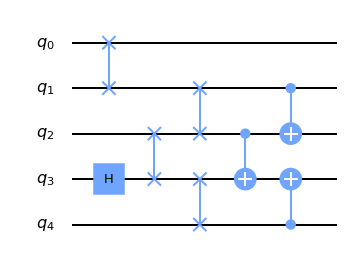

In [13]:
cmap_adv5_2 = CouplingMap(couplinglist = [[0, 1], [1, 2], [2, 3], [3, 4]])
ls = LookaheadSwap(coupling_map = cmap_adv5_2)
pass_manager = PassManager(ls)
qc_adv5_2 = pass_manager.run(qc_adv5_1)
qc_adv5_2.draw('mpl')

In [14]:
qc_adv5_2.size()

8

### Answer for Q2.5: 

**2)** 8

This last question (Q2.5) is a bit tricky because it could be interpreted in slightly different way. Transpiling of the circuit above can also be done using the `transpile` function from the `qiskit.compiler` module. This function also accepts a `routing_method` argument that can take the value `lookahead`, and a `coupling_map` argument to which we can assign the one given in this problem. By closely inspecting the source code of the `transpile` function, it can be seen that the `routing_method` and `coupling_map` parameters are actually parsed down to the `PassManager` guaranteeing that the `LookaheadSwap` function with the (coupling map as an argument) is used as part of the transpiling optimization.

The problem with using the `transpile` function is that it does more than just optimizing using these two arguments. `transpile` uses something known as [Preset Pass Managers](https://qiskit.org/documentation/apidoc/transpiler_preset.html), which are a more "generic" way to optimize the transpiled circuit. The issue here is that, even when using the Preset Pass Manager `level_0_pass_manager` (which is not supposed to do any additional optimization), the function performs many other passes, including the `CXDirection` pass, which (from Qiskit's documentation): "Rearrange[s] the direction of the cx nodes to match the directed coupling map."

Let's transpile the circuit using this method and see what we get:

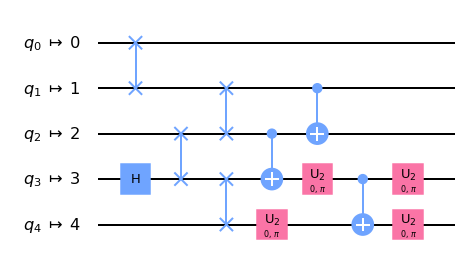

In [15]:
from qiskit.compiler import transpile
qc_adv5_trans = transpile(qc_adv5_1, optimization_level = 0, coupling_map = cmap_adv5_2, routing_method = 'lookahead')
qc_adv5_trans.draw('mpl')

It can be seen that the resulting circuit is very similar to the one we obtained before, with the only difference being that the CNOT between qubits 4 and 3 has been decomposed into a series of U2 rotation gates and a CNOT between qubits 3 and 4. Since the quesiton specifically asks for gates "using only the pass LookaheadSwap", this approach is not correct.